In [1]:
cd ../TileEM/

/srv/data/home/jlee782/crowd-seg/analysis/TileEM


In [2]:
%pylab inline
%load_ext autoreload
%autoreload 2
from paper_visualizations import * 
from PixelEM import * 
from test_sample import test_sample_obj
import json
import pandas as pd
object_lst = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 36, 37, 38, 39, 42, 43, 44, 45, 46, 47]

Populating the interactive namespace from numpy and matplotlib


The tiles are generated from the new PixTile algorithm

In [50]:
tiles = pkl.load(open("pixel_em/10workers_rand0/obj1/tiles.pkl"))

In [9]:
tile = np.array(list(tiles[0]))

In [10]:
tile

array([[102, 595],
       [ 33, 440],
       [342, 418],
       ..., 
       [116, 548],
       [ 63, 255],
       [356,  75]])

In [11]:
max(tile[:,0])

479

In [12]:
max(tile[:,1])

639

In [22]:
def edge_neighbor_widx(wmap,source):
    x=source[0]
    y=source[1]
    valid_neighbors = []
    w,h = np.shape(wmap)
    if x+1<w:
        valid_neighbors.append((x+1,y))
    if y+1<h:
        valid_neighbors.append((x,y+1))
    if x-1>=0:
        valid_neighbors.append((x-1,y))
    if y-1>=0:
        valid_neighbors.append((x,y-1))
    #return (x+1,y),(x,y+1),(x-1,y),(x,y-1)
    return valid_neighbors

In [29]:
sample='5workers_rand0'
objid=1
imgsize = pkl.load(open("pixel_em/{}/obj{}/mega_mask.pkl".format(sample,objid)))

In [63]:
adjacent_lst = [[] for t in tiles]
exclude_lst = [[] for t in tiles]

In [68]:
len(tiles)

1453

In [71]:
len(tiles[0])

278876

In [75]:
len(tiles[9])

76

In [72]:
len(tiles[-1])

23180

In [78]:
for i in range(1,len(tiles)-1): # exclude the big outside tile, we don't really need to know who is connected to the outside tile
    
    for pix in tiles[i]: 
        if pix not in exclude_lst[i]:
            neighbors = edge_neighbor_widx(imgsize,pix)
            # get the adjacent tile of from the neighboring pixel
            adjacent_tile =-1
            for nix in neighbors:
                tiles_exclude_self = [t  for t in tiles if t!=tiles[i]] # not checking adjacency against self
                for tidx,t in enumerate(tiles_exclude_self):
                    if nix in t:
                        adjacent_lst[i].append(tidx)
                        adjacent_tile = tidx
                        # store boundary information 
                        break
                break
            exclude_lst[i].append(tiles[tidx])

In [83]:
hard_lst = [1,len(tiles)-1]
for hard_tidx in hard_lst:
    for atidx,at in enumerate(adjacent_lst):
        if hard_tidx in at:
            adjacent_lst[hard_tidx].append(atidx)

In [86]:
# Testing 

In [87]:
test_tidx=15
adjacent_lst[test_tidx]

[337, 227, 337, 227, 337, 227]

In [88]:
tiles[15]

{(285, 245), (285, 246)}

In [85]:
adjacent_lst[-1]

[1057,
 1345,
 1377,
 1330,
 1330,
 1356,
 1342,
 1412,
 1377,
 1221,
 1351,
 1375,
 1340,
 1377,
 1374,
 1418,
 1400,
 1377,
 1232,
 1328,
 1342,
 1363,
 1440,
 1083,
 1363,
 1423,
 1379,
 1340,
 1377,
 1418,
 1330,
 1404,
 1424,
 1364,
 1441,
 1311,
 1354,
 1343,
 1418,
 1334,
 1377,
 1340,
 1356,
 1340,
 1411,
 1411,
 1428,
 1418,
 1173,
 1144,
 1377,
 1191,
 1330,
 1330,
 1377,
 1340,
 1383,
 1379,
 1343,
 1377,
 1345,
 1377,
 1340,
 1183,
 1337,
 1330,
 1057,
 1345,
 1377,
 1330,
 1330,
 1356,
 1342,
 1412,
 1377,
 1221,
 1351,
 1375,
 1340,
 1377,
 1374,
 1418,
 1400,
 1377,
 1232,
 1328,
 1342,
 1363,
 1440,
 1083,
 1363,
 1423,
 1379,
 1340,
 1377,
 1418,
 1330,
 1404,
 1424,
 1364,
 1441,
 1311,
 1354,
 1343,
 1418,
 1334,
 1377,
 1340,
 1356,
 1340,
 1411,
 1411,
 1428,
 1418,
 1173,
 1144,
 1377,
 1191,
 1330,
 1330,
 1377,
 1340,
 1383,
 1379,
 1343,
 1377,
 1345,
 1377,
 1340,
 1183,
 1337,
 1330,
 1363,
 1330,
 1232,
 1404,
 1379,
 1415,
 1401,
 1396,
 1278,
 1377,
 1363,

In [79]:
adjacent_tile

1451

we don't really need to know who is connected to the outside tile

In [76]:
tarea = [len(t) for t in tiles]

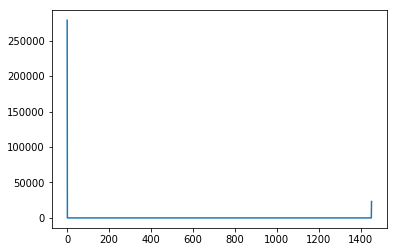

In [77]:
plt.plot(tarea)

In [69]:
adjacent_lst

[[],
 [254,
  695,
  254,
  250,
  426,
  426,
  285,
  250,
  250,
  250,
  254,
  695,
  254,
  695,
  254,
  250,
  426,
  426,
  285,
  250,
  250,
  250,
  254,
  695,
  254,
  695,
  254,
  250,
  426,
  426,
  285,
  250,
  250,
  250,
  254,
  695],
 [173,
  173,
  235,
  274,
  337,
  173,
  337,
  337,
  173,
  173,
  173,
  235,
  274,
  337,
  173,
  337,
  337,
  173],
 [163, 180, 163, 180],
 [313, 313],
 [354, 354],
 [210, 210],
 [144, 144],
 [368, 368],
 [137,
  553,
  541,
  264,
  318,
  318,
  318,
  263,
  275,
  456,
  297,
  223,
  318,
  314,
  406,
  308,
  344,
  159,
  137,
  553,
  541,
  264,
  318,
  318,
  318,
  263,
  275,
  456,
  297,
  223,
  318,
  314,
  406,
  308,
  344,
  159],
 [385, 385],
 [182, 182],
 [574,
  303,
  303,
  349,
  287,
  286,
  286,
  181,
  610,
  610,
  574,
  303,
  303,
  349,
  287,
  286,
  286,
  181,
  610,
  610],
 [0, 0, 0, 0, 0, 0],
 [181, 181, 181, 181],
 [337, 227, 337, 227],
 [337, 337],
 [173, 173],
 [597, 597],
 

In [53]:
tiles.pop?

In [35]:
nix in tiles

False

In [57]:
len([t  for t in tiles if t!=tiles[i]])

1452

In [58]:
len(tiles)

1453